In [32]:
!pip install tweepy

In [38]:
!pip install folium

     |████████████████████████████████| 102kB 1.4MB/s ta 0:00:011


In [43]:
!pip install locationlistener

  ERROR: Could not find a version that satisfies the requirement locationlistener (from versions: none)
ERROR: No matching distribution found for locationlistener


In [35]:
!pip install tweetutilities

  ERROR: Could not find a version that satisfies the requirement tweetutilities (from versions: none)
ERROR: No matching distribution found for tweetutilities


In [11]:
conda install  -c conda-forge keys
!pip install keys

SyntaxError: invalid syntax (<ipython-input-11-b0cf0e9238e9>, line 1)

In [7]:
!pip install geopy

     |████████████████████████████████| 112kB 944kB/s eta 0:00:01


In [33]:
!pip install textblob

In [34]:
!pip install preprocessor

# Building a Sentiment Analysis of Tweets 
## * Tweepy
## * TextBlob
## * WordCloud
## * NLTK

## Question: Which political leader is more polarizing in his tweets?

## Goal:
To analyze a prominent global leader's tweets': 1) Themes; 2) Sentiments (polarity and subjectivity)' and 3)  

To map out his relation to his Followers through a Neural Network.

We could  use Word2Vec on out Twitter dataset to determine which phrases appear the most frequently in tweets to compare with whether they have been retweeted or flagged.

## Resources 
### Use to perform authentication: 
    auth = tweepy.0AuthHandler(consumer_key, consumer_secret)
Twitter Sentiment Analysis: https://www.youtube.com/watch?v=o_OZdbCzHUA

# Project 1: Javad Zarif
@JZarif
Foreign Minister of Islamic Republic of Iran
https://www.youtube.com/watch?v=ujId4ipkBio&t=361s

In [39]:
import pandas as pd

import tweepy 
from textblob import TextBlob
import re
from wordcloud import WordCloud
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import nltk
from nltk.corpus import stopwords
from collections import Counter

import folium

In [2]:
# from secrets import consumer_key,consumer_secret
#Need the API
    #consumer_key = ""
    #consumer_secret = ""

consumer_key = 'R8y38TnjdzbUMhXmiqrdOlFNo'
consumer_secret = '0SHVRVqighg3nbvU72303AVCNmyue6usBukhB7xiUZlL5wo3nE' 

auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)
api = tweepy.API(auth)

## Load Data set

In [6]:
#Create a dataframe with a column and label column as 'Tweets'
import pandas as pd
df = pd.DataFrame([tweet.full_text for tweet in zarif_tweets], columns = ['Tweets'])
df.head(10)

,Tweets
0,.@AmbJohnBolton has repeated today what he sai...
1,"""Pirates of the Caribbean"" have their own judg..."
2,RT @TakhtRavanchi: The result of the vote in #...
3,In Beirut today to express the solidarity of t...
4,US is so desperate to show support for its str...
5,I just published Using Security Council to Des...
6,I just published The World in Transition https...
7,"The first three (of five) talks on ""The World ..."
8,I'll be delivering the third of five online ta...
9,"75 years ago today, the US gained the infamy o..."


In [8]:
import keys

ModuleNotFoundError: No module named 'keys'

In [27]:
#Extract 200 Tweets from the Twitter User
zarif_tweets = api.user_timeline(screen_name = 'JZarif', count = 200, 
                                 lang ='en', tweet_mode = 'extended')

#Show the 10 most recent tweets
print("Show the 10 most recent tweets: \n")
i =1
for tweet in zarif_tweets[0:9]:
    print (str(i) +') '+ tweet.full_text + '\n')
    i = i + 1

Show the 10 most recent tweets: 

1) .@AmbJohnBolton has repeated today what he said on May 8, 2018, while National Security Advisor in the Trump administration.

At least he is consistent—a trait notably absent in this US administration.

US recourse to Dispute Resolution Mechanism in 2231 has NO LEG TO STAND ON. https://t.co/txNBhyOkv4

2) "Pirates of the Caribbean" have their own judges and courts now.

Sadly for them, stolen booty wasn't Iran's. Fuel was sold F.O.B. Persian Gulf. Ship and flag weren't ours either.

Hollow, cheap propaganda doesn’t deflect from miserable failure of US diplomatic malpractice at UN.

3) RT @TakhtRavanchi: The result of the vote in #UNSC on arms embargo against Iran shows—once more—the US' isolation.

Council's message: NO t…

4) In Beirut today to express the solidarity of the people of Iran with all Lebanese, and to offer our readiness to help. 

This is a time to assist and facilitate - not to impose and dictate.

We in the region are all in this to

In [15]:
#Insert additional columns: 'retweet_count', 'user'
zarif_tweets_user = api.get_user('javed')

In [16]:
zarif_tweets_user.status.text

'No need to renew your password if it is not "detected" as compromised 😎... Microsoft provides their reasoning ...\nhttps://t.co/nzFq5zzked'

In [19]:
#get description for column
zarif_tweets_user.description

'Dodos do tweet! ( #ProudMauritian ) . My views are my own .'

In [28]:
#followers as a column
zarif_tweets_user.followers

<bound method User.followers of User(_api=<tweepy.api.API object at 0x1224ad8d0>, _json={'id': 6758372, 'id_str': '6758372', 'name': 'Javed', 'screen_name': 'javed', 'location': 'Mauritius', 'profile_location': None, 'description': 'Dodos do tweet! ( #ProudMauritian ) . My views are my own .', 'url': 'https://t.co/99COuRdDNG', 'entities': {'url': {'urls': [{'url': 'https://t.co/99COuRdDNG', 'expanded_url': 'http://javedmandary.blogspot.com', 'display_url': 'javedmandary.blogspot.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 415, 'friends_count': 335, 'listed_count': 35, 'created_at': 'Tue Jun 12 04:28:27 +0000 2007', 'favourites_count': 164, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': False, 'statuses_count': 1462, 'lang': None, 'status': {'created_at': 'Mon Jun 03 10:11:09 +0000 2019', 'id': 1135489086310014977, 'id_str': '1135489086310014977', 'text': 'No need to renew your password if it is not "detected

In [21]:
#Number of Followers
zarif_tweets_user.followers_count

415

In [22]:
#Number of Friends
zarif_tweets_user.friends_count

335

In [23]:
followers =[]

In [25]:
cursor = tweepy.Cursor(api.followers, screen_name ='zarif_tweets_user')
cursor

## Locating Tweets
Extract Locations  to visualize on a map

In [36]:
#drop unusuable
df2 = df.dropna()

In [41]:
#Create the location listener
from location listener import LocationListener

NameError: name 'counts' is not defined

In [ ]:
counts['locations']

In [37]:
#Map w/Folium
worldmap = folium.Map(location=['latitude','longiture'], 
                      tiles = 'Stamen Terrain',
                      zoom_start =5,
                      detect_retina = True
                     )

ModuleNotFoundError: No module named 'folium'

## Clean text

In [33]:
def on_status(self,status): '''Called when TWitter pushes a new tweet'''
    #Get the tweet's text
    try:
        tweet_text = status.extended_tweet.full_text
    except:
        tweet_twext = status.text
        
    #ignore retweets
    if tweet_text.startswith('RT')
        return
    
    tweet_text = p.clean(tweet_text) #Clean the tweet
    
    #ignore the tweet if the topic is not in the tweet text
    if self.topic.lower() not in tweet_text.lower():
        return
    
    #update self.setniment_dic with the poliarty
    blob = TextBlob(tweet_text)
    if blob.sentiment.polarity > 0:
        sentiment = "+"
        self.sentiment_dict['positive'] += 1
    elif blob.sentiment.polarity == 0:
        sentiment = ''
        self.sentiment_dict['neutral'] += 1
    else:
        sentiment = '-'
        self.sentiment_dict['negative'] +=1
        
    #display the tweet
    print(f'{sentiment}{status.user.screen_name}: {tweet_text}\n')
    
    self.tweet_count == 1 #track number of tweets processed
    
    #if TWEET_LIMIT is reached, return False to terminiate streaming 
    return self.tweet_count !=self.TWEET.LIMIT
        

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 5)

In [34]:
from tweetutilities import get_geocodes

ModuleNotFoundError: No module named 'tweetutilities'

In [12]:
#Create a function to clean tweets
    
def clean_text(text):
    text = re.sub(r'@{[A-Za-z0-9]+', '', text)  #Checking for '@' and all upper case letters following
    text = re.sub(r'#', '', text) #Remove hashtag
    text = re.sub(r'RT[\s] +','', text)  #Remove Retweets
    text = re.sub(r'https?:\/\/\S+','',text) #Remove the hyperlink
    
    return text

#Cleaning the text
df['Tweets'] = df['Tweets'].apply(clean_text)
df

,Tweets,subjectivity,polarity,Analysis
0,"75 years ago today, the US gained the infamy o...",0.812500,-0.056250,Negative
1,@iabbasian ممنون از لطف شما و تذکرتان.,0.000000,0.000000,Neutral
2,@iabbasian سلام دوست عزیزم. من خودم به عربی و ...,0.000000,0.000000,Neutral
3,عندما يريد الناطقون بالفارسية تقديم التعازي لل...,0.000000,0.000000,Neutral
4,When Persian speakers want to express their co...,0.200000,0.000000,Neutral
...,...,...,...,...
195,"At the UNSC, I explained what Hormuz Peace End...",0.000000,0.000000,Neutral
196,Your daily reminder that Israel possesses the ...,0.500000,0.000000,Neutral
197,E3's paralysis in fulfilling their obligations...,0.472576,-0.093636,Negative
198,9/22/1980 is a dark day for Iranians as it mar...,0.200000,-0.075000,Negative


In [13]:
#Create a function to get 'subjectivity' and 'polarity'

def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
    return TextBlob(text).sentiment.polarity

#Create two new columns
df['subjectivity'] = df['Tweets'].apply(get_subjectivity)
df['polarity'] = df['Tweets'].apply(get_polarity)

#Show the new dataframe
df

,Tweets,subjectivity,polarity,Analysis
0,"75 years ago today, the US gained the infamy o...",0.812500,-0.056250,Negative
1,@iabbasian ممنون از لطف شما و تذکرتان.,0.000000,0.000000,Neutral
2,@iabbasian سلام دوست عزیزم. من خودم به عربی و ...,0.000000,0.000000,Neutral
3,عندما يريد الناطقون بالفارسية تقديم التعازي لل...,0.000000,0.000000,Neutral
4,When Persian speakers want to express their co...,0.200000,0.000000,Neutral
...,...,...,...,...
195,"At the UNSC, I explained what Hormuz Peace End...",0.000000,0.000000,Neutral
196,Your daily reminder that Israel possesses the ...,0.500000,0.000000,Neutral
197,E3's paralysis in fulfilling their obligations...,0.472576,-0.093636,Negative
198,9/22/1980 is a dark day for Iranians as it mar...,0.200000,-0.075000,Negative


### Observation: 
We can now see the three columns for analysis, like wordcloud to visualize.

## Analysis: Word Cloud

In [14]:
#Plot the Word Cloud
all_words = ''.join([twts for twts in df['Tweets']])
WordCloud = WordCloud(width = 500, height= 300, random_state = 21, 
                      max_font_size =110).generate(all_words)
plt.imshow(WordCloud, interpolation= "bilinear")
plt.axis('off')
plt.show

TypeError: 'WordCloud' object is not callable

s### Observation:
* We see that Iran and US are most noticeable.
* We see that JCPOA, which stands for joint agreement between Iran, US, Iran, Germany, and UK promoting nuclear nonproliferation goals achieved during Obama-Biden administration.



In [15]:
#Create a function to denote the positive, negative, and neutral analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    if score == 0:
        return 'Neutral'
    if score > 0:
        return 'Positive'
    
df['Analysis'] = df['polarity'].apply(getAnalysis)

#Show df
df

,Tweets,subjectivity,polarity,Analysis
0,"75 years ago today, the US gained the infamy o...",0.812500,-0.056250,Negative
1,@iabbasian ممنون از لطف شما و تذکرتان.,0.000000,0.000000,Neutral
2,@iabbasian سلام دوست عزیزم. من خودم به عربی و ...,0.000000,0.000000,Neutral
3,عندما يريد الناطقون بالفارسية تقديم التعازي لل...,0.000000,0.000000,Neutral
4,When Persian speakers want to express their co...,0.200000,0.000000,Neutral
...,...,...,...,...
195,"At the UNSC, I explained what Hormuz Peace End...",0.000000,0.000000,Neutral
196,Your daily reminder that Israel possesses the ...,0.500000,0.000000,Neutral
197,E3's paralysis in fulfilling their obligations...,0.472576,-0.093636,Negative
198,9/22/1980 is a dark day for Iranians as it mar...,0.200000,-0.075000,Negative


In [16]:
#Print all the positive tweets
j =1
sorted_DF = df.sort_values(by = 'polarity')
for i in range(0, sorted_DF.shape[0]):
    if (sorted_DF['Analysis'][i] == 'Positive'):
        print(str(j) + sorted_DF['Tweets'][i])
        print()  #print a new line
        j = j+1
      

1Reiterated Iran's strong and steadfast solidarity with people of Lebanon in call with FM Wehbeh. 

Iran is sending field hospital &amp; medicine to assist with disaster relief. 

Iran stands with Lebanon. 

2Our thoughts and prayers are with the great and resilient people of Lebanon. 

As always, Iran is fully prepared to render assistance in any way necessary. 

Stay strong, Lebanon.

🖤🇱🇧

3Today, Iranians mark their seismic achievement in 1906

Demanding accountability from the king, they compelled him to allow formation of the first parliament in our region

While mostly ignored before Islamic Revolution, we in government are now held to account by the Parliament. 

4Just had a very substantive, frank and friendly video conversation with UAE FM @ABZayed, discussing Covid as well as bilateral, regional and global situations. 

We agreed to continue dialog on theme of hope—especially as region faces tough challenges, and tougher choices ahead. 

5Very productive meeting with Chairman

### Observation:
94 out of the 200 tweets are positive.

In [17]:
#Let's see Negative Tweets in new df
j = 1
sorted_DF = df.sort_values(by = 'polarity')
for i in range(0, sorted_DF.shape[0]):
    if (sorted_DF['Analysis'][i] == 'Negative'):
        print(str(j) + ')' + sorted_DF['Tweets'][i])
        print()  #print a new line
        j = j+1

1)75 years ago today, the US gained the infamy of becoming the 1st and ONLY user of nuclear weapons. And against innocents.

Today, US &amp; Israeli nukes threaten our region.

It's long overdue to end nuclear nightmare &amp; the MAD doctrine of Mutually Assured Destruction.

Hiroshima75 

2)As we mark EidAlAdha (Feast of the Sacrifice), let us all pray and commit ourselves to sacrifice what some—sadly—are willing to kill for: short-sighted, zero-sum and selfish interests.

Our Ummah and our global community require this paradigm shift for survival.

3)Productive talks in Baghdad with PM @MAKadhimi, Pres. @BarhamSalih, Speaker Halbousi, FM @Fuad_Hussein1 and judicial, political and military leaders.

Agenda: Expanding cooperation to benefit our peoples—and the region.

Next stop: Erbil for meetings with Kurdish leadership. 

4)25 yrs ago today, SrebrenicaGenocide began as Europe failed to uphold its basic duties. Quarter of a century later Europe is plagued by same ineptitude.

The fai

### Observation:
57 out of the 200 tweets are negative. In contrast, there are almost double the number of positive tweets by Foreign Minister Javed Zarif.
* Interesting: Mentioning Uniting for Palestinians is considered 'negative'.
* Arguing for "Stop War" as a theme came up as negative.

## Visualize Tweets by Foreign Minister Javed Zarif.

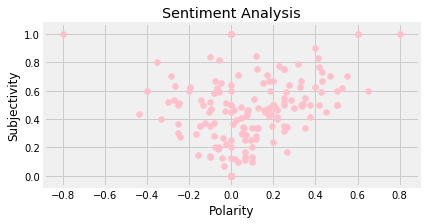

In [18]:
#Plot the polarity and subjectivity
plt.figure(figsize=(6,3)) 
for i in range(0, sorted_DF.shape[0]): 
    plt.scatter(df['polarity'][i], df['subjectivity'][i], color = 'Pink') 

plt.title ('Sentiment Analysis' ) 
plt.xlabel ('Polarity') 
plt.ylabel ('Subjectivity')     
plt.show()
    

### Observation:
We see that Javed's tweets mostly skew positive. 

In [19]:
# Get the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

#round ((ptweets.shape[0] / df.shape[0])*100,1)

print(ptweets)

5      Reiterated Iran's strong and steadfast solidar...
6      Our thoughts and prayers are with the great an...
9      Today, Iranians mark their seismic achievement...
12     Just had a very substantive, frank and friendl...
13     Very productive meeting with Chairman of the I...
                             ...                        
190    Important progress in Yerevan as Iran joins EE...
192    On Rūmī's 812th birthday, our region and the w...
193    "Any war that the United Starts, it won't be a...
194    Thanks to technology, I was able to see and ta...
199    Told @margbrennan: You sell me a building, but...
Name: Tweets, Length: 97, dtype: object


In [20]:
round ((ptweets.shape[0] / df.shape[0])*100,1)

48.5

In [49]:
# Get the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

#round ((ptweets.shape[0] / df.shape[0])*100,1)

print(ntweets)

1      Productive talks in Baghdad with PM @MAKadhimi...
3      25 yrs ago today, SrebrenicaGenocide began as ...
5      Don't believe the hype: Iran triggered JCPOA D...
9      The US isn't merely violating JCPOA and bullyi...
11     .@SecPompeo is so desperate to mislead the wor...
12     E3 must stop public face-saving &amp; muster t...
14     Iran &amp; Russia are "determined to deal with...
16     Productive talks with my friend @MevlutCavusog...
17     International Criminal COURT now blackmailed b...
19     US has tried to heighten tension w/ Iran &amp;...
20     We achieved humanitarian swap *despite* your s...
24     Some don't think BlackLivesMatter.\n\nTo those...
29     Disgusting that those whose civilization found...
33     Today is "Honoring Philanthropists' Day" in ou...
38     2 yrs ago, @SecPompeo and his boss declared "C...
41     US has been bullying all against UNSC Resoluti...
44     Iran will be EXPORTING ventilators in a few mo...
53     Don’t be mislead by usua

In [50]:
round ((ntweets.shape[0] / df.shape[0])*100,1)

28.5

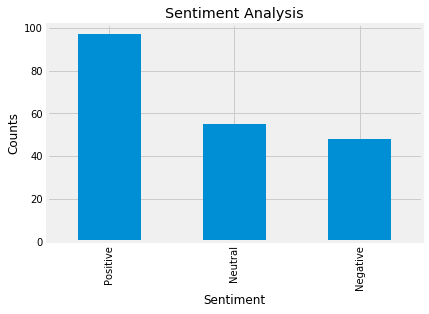

In [21]:
#Show the value counts
df['Analysis'].value_counts()

#Plot and show
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel ('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

### Observation:
As mentioned earlier, this Twitter account's sample of 200 tweets reflects mostly positive tweets. Approximimately 75 percent of the tweets are , thus 25 percent are neutral. 
Let's look at 200 of his followers below:

In [22]:
#Create a list of followers
followers = []

In [23]:
cursor = tweepy.Cursor(api.followers, screen_name = 'JZarif', count= 200) #Default is groups of 20.
for account in cursor.items(10):
    followers.append(account.screen_name)

In [24]:
print("Followers:", ''.join(sorted(followers, key=lambda s:s.lower())))
#normalize by number of followers based on RT's

Followers: Abolfaz36015828Alakpalak1caglayankejeFatima22011159Hadi65722210miss_khodaiemmehdipiranMohsen99744875QWVb99P3L3uFYRISadiIbnul


In [25]:
#Get Followers' ID Method
followers_ids = []
#Below is protected info

In [27]:
#Determine who Javed Zarif follows: 'friends'
friends = []
cursor = tweepy.Cursor(api.friends, screen_name = 'JZarif')
for friend in cursor.items(10):
    friends.append(friend.screen_name)

In [28]:
print('Friends:', ''.join(sorted(friends, key =  lambda s: s.lower())))

Friends: araghchiebtekarmHassanRouhaniIPIS_IranIranForMinIRIMFA_ARIRIMFA_ENkhamenei_irSAMOUSAVI9TakhtRavanchi


### Trending Topics

In [30]:
#Trending Topics
trends_available = api.trends_available()
len(trends_available)

467

In [31]:
trends_available[0]

{'name': 'Worldwide',
 'placeType': {'code': 19, 'name': 'Supername'},
 'url': 'http://where.yahooapis.com/v1/place/1',
 'parentid': 0,
 'country': '',
 'woeid': 1,
 'countryCode': None}

In [32]:
trends_available[1]

{'name': 'Winnipeg',
 'placeType': {'code': 7, 'name': 'Town'},
 'url': 'http://where.yahooapis.com/v1/place/2972',
 'parentid': 23424775,
 'country': 'Canada',
 'woeid': 2972,
 'countryCode': 'CA'}

In [33]:
#Trending Places
world_trends = api.trends_place(id=1)

In [34]:
trends_list =world_trends[0]['trends']

In [35]:
#Aug 6th's Trend topic list
trends_list[0]

{'name': '#우리워너원_3주년에도_사랑해',
 'url': 'http://twitter.com/search?q=%23%EC%9A%B0%EB%A6%AC%EC%9B%8C%EB%84%88%EC%9B%90_3%EC%A3%BC%EB%85%84%EC%97%90%EB%8F%84_%EC%82%AC%EB%9E%91%ED%95%B4',
 'promoted_content': None,
 'query': '%23%EC%9A%B0%EB%A6%AC%EC%9B%8C%EB%84%88%EC%9B%90_3%EC%A3%BC%EB%85%84%EC%97%90%EB%8F%84_%EC%82%AC%EB%9E%91%ED%95%B4',
 'tweet_volume': 470624}

In [36]:
#Volume of 10,000 tweets
trends_list = [t for t in trends_list if t['tweet_volume']]

In [37]:
from operator import itemgetter
trends_list.sort(key = itemgetter('tweet_volume'),reverse= True)

In [38]:
for trend in trends_list[:5]:
    print(trend['name'])

#우리워너원_3주년에도_사랑해
#DishaAndSSRHomicide
#SevgiLimitTanimaz
Hiroshima
#TREASURE_DEBUT_DDAY


In [39]:
#Let's get top trending topics in Washington, DC on July 19th
dc_trends = api.trends_place(id= 2514815) #WOEID = Washington, District of Columbia, 2514815
dc_list = dc_trends[0]['trends']
dc_list = [t for t in dc_list if t['tweet_volume']]
dc_list.sort(key =itemgetter('tweet_volume'), reverse = True)
for trend in dc_list[:10]:
    print(trend['name'])

Biden
Lebanon
Hiroshima
#BB22
#FOURTHCOUNTDOWN
The NRA
Pence
Lakers
Letitia James
Independence Day


### Observation:
We see that the top 10 trending topics in DC are Biden, Lebanon, Hiroshima, two hashtags, The NRA, Pence, Lakers, Letitia James, and Independence Day. 

## Sentiment Analysis

In [41]:
#Select tweets for review
df['tweets_fixed'] = df['Tweets'].apply(lambda x: x if type(x) == str else '')

In [42]:
#Review subjectivity and polarity of Zarif
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

df['polarity'] = df['tweets_fixed'].apply(pol)
df['subjectivity'] = df['tweets_fixed'].apply(sub)
df

,Tweets,subjectivity,polarity,Analysis,tweets_fixed
0,"75 years ago today, the US gained the infamy o...",0.812500,-0.056250,Negative,"75 years ago today, the US gained the infamy o..."
1,@iabbasian ممنون از لطف شما و تذکرتان.,0.000000,0.000000,Neutral,@iabbasian ممنون از لطف شما و تذکرتان.
2,@iabbasian سلام دوست عزیزم. من خودم به عربی و ...,0.000000,0.000000,Neutral,@iabbasian سلام دوست عزیزم. من خودم به عربی و ...
3,عندما يريد الناطقون بالفارسية تقديم التعازي لل...,0.000000,0.000000,Neutral,عندما يريد الناطقون بالفارسية تقديم التعازي لل...
4,When Persian speakers want to express their co...,0.200000,0.000000,Neutral,When Persian speakers want to express their co...
...,...,...,...,...,...
195,"At the UNSC, I explained what Hormuz Peace End...",0.000000,0.000000,Neutral,"At the UNSC, I explained what Hormuz Peace End..."
196,Your daily reminder that Israel possesses the ...,0.500000,0.000000,Neutral,Your daily reminder that Israel possesses the ...
197,E3's paralysis in fulfilling their obligations...,0.472576,-0.093636,Negative,E3's paralysis in fulfilling their obligations...
198,9/22/1980 is a dark day for Iranians as it mar...,0.200000,-0.075000,Negative,9/22/1980 is a dark day for Iranians as it mar...


## Analysis: Bag of Words

In [89]:
import spacy
# Parse the cleaned tweets. This can take a bit.
nlp = spacy.load('en')
tweets_doc = nlp()

NameError: name 'Tweets' is not defined

In [84]:
# Utility function to create a list of the 2000 most common words.
def bag_of_words(text):
    
    # Filter out punctuation and stop words.
    allwords = [token.lemma_
                for token in text
                if not token.is_punct
                and not token.is_stop]
    
    # Return the most common words.
    return [item[0] for item in Counter(allwords).most_common(2000)]

In [ ]:
# Creates a data frame with features for each word in our common word set.
# Each value is the count of the times the word appears in each sentence.
def bow_features(sentences, common_words):
    
    # Scaffold the data frame and initialize counts to zero.
    df2 = pd.DataFrame(columns=common_words)
    df['text_sentence'] = sentences[0]
    df['text_source'] = sentences[1]
    df.loc[:, common_words] = 0
    
    # Process each row, counting the occurrence of words in each sentence.
    for i, sentence in enumerate(df['text_sentence']):
        
        # Convert the sentence to lemmas, then filter out punctuation,
        # stop words, and uncommon words.
        words = [token.lemma_
                 for token in sentence
                 if (
                     not token.is_punct
                     and not token.is_stop
                     and token.lemma_ in common_words
                 )]
        
        # Populate the row with word counts.
        for word in words:
            df.loc[i, word] += 1
        
        # This counter is just to make sure the kernel didn't hang.
        if i % 50 == 0:
            print("Processing row {}".format(i))
            
    return df

# Set up the bags.
alicewords = bag_of_words(alice_doc)
persuasionwords = bag_of_words(persuasion_doc)

# Combine bags to create a set of unique words.
common_words = set(alicewords + persuasionwords)

## Analysis:  Conducting TFIDF

In [66]:
X_train = df['Tweets']
X = df['Tweets']
df

,Tweets,subjectivity,polarity,Analysis
0,Fruitful continuation of visit to Iraqi Kurdis...,0.733333,0.433333,Positive
1,Productive talks in Baghdad with PM @MAKadhimi...,0.066667,-0.033333,Negative
2,Today is 5th anniv. of the JCPOA—last decade’s...,0.500000,0.500000,Positive
3,"25 yrs ago today, SrebrenicaGenocide began as ...",0.135714,-0.102381,Negative
4,My virtual dialog earlier today with Rome 2020...,0.333333,0.100000,Positive
...,...,...,...,...
195,As the world—minus 3 or 2 panicked cohorts—was...,0.250000,0.000000,Neutral
196,"Did you know, @realdonaldtrump, that Netanyahu...",0.063889,0.000000,Neutral
197,,0.000000,0.000000,Neutral
198,The possessor of REAL nukes cries wolf—on an A...,0.411364,0.206818,Positive


In [70]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from sklearn.model_selection import train_test_split

vect = CountVectorizer()
vect.fit(X)

CountVectorizer()

In [74]:
vectorizer = TfidfVectorizer(max_df=.6, # drop words that occur in more than 60% the tweets
                             min_df=2, # only use words that appear at least twice
                             stop_words='english', 
                             lowercase=True, #convert everything to lower case (since shouting uses CAPITALIZING WORDS for EMPHASIS)
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )


#Applying the vectorizer to 'X', which is the 'Tweets' column to produce zarif_tweets_tfidf
zarif_tweets_tfidf = vectorizer.fit_transform(X)
print("Number of features: %d" % zarif_tweets_tfidf.get_shape()[1])

#splitting into training and test sets
X_train_tfidf, X_test_tfidf= train_test_split(zarif_tweets_tfidf, test_size=0.4, random_state=0)


#Reshapes the vectorizer output into something people can read
X_train_tweets_tfidf_csr = X_train_tfidf.tocsr()

#number of paragraphs
n = X_train_tweets_tfidf_csr.shape[0]

#A list of dictionaries, one per paragraph
tfidf_bypara = [{} for _ in range(0,n)]
#List of features
terms = vectorizer.get_feature_names()
print(terms)

Number of features: 682
['000', '11', '15', '17', '19', '1979', '19th', '2017', '2018', '2020', '2231', '24', '25', '30', '36', '40', '5th', 'abandon', 'able', 'abroad', 'absurd', 'access', 'accord', 'achieved', 'achieving', 'act', 'action', 'adana', 'addiction', 'address', 'administration', 'admitted', 'adventurism', 'advice', 'affairs', 'affected', 'afghan', 'afghanistan', 'afraid', 'african', 'agenda', 'aggression', 'ago', 'agreed', 'agreement', 'ahead', 'allies', 'alternative', 'ambassador', 'american', 'amid', 'amp', 'ancient', 'anniversary', 'antonioguterres', 'apartheid', 'appeasement', 'appeasing', 'appetite', 'appreciate', 'armed', 'arms', 'arrogant', 'asia', 'assassination', 'assassinations', 'assist', 'assistance', 'astana', 'attack', 'attacks', 'attend', 'avoid', 'away', 'b_team', 'bank', 'base', 'begin', 'begun', 'behavior', 'believe', 'better', 'bilateral', 'blamed', 'blaming', 'blood', 'bloodshed', 'blueprint', 'body', 'bowing', 'break', 'bring', 'brother', 'building', '

In [77]:
#for each paragraph, lists the feature words and their tf-idf scores
for i, j in zip(*X_train_tweets_tfidf_csr.nonzero()):
    tfidf_bypara[i][terms[j]] = X_train_tweets_tfidf_csr[i, j]

#Keep in mind that the log base 2 of 1 is 0, so a tf-idf score of 0 indicates that the word was present once in that sentence.
print('Original sentence:', X[10])
print('Tf_idf vector:', tfidf_bypara[25])

Original sentence: 在中国端午节来临前夕，很高兴同中国国务委员兼外长王毅举行视频会晤。我们就深化两国全面战略伙伴关系、推动25年双边合作计划、加强在国际事务中相互支持等议题达成共识。我们都重申对伊核协议、多边主义及国际法的支持，共同反对单边主义、反对削弱伊核协议。借此机会，要特别祝中国朋友们端午安康！
Tf_idf vector: {'worldwide': 0.26495932987212667, 'colleagues': 0.238954333063999, 'assistance': 0.25031407515543835, 'embassies': 0.26495932987212667, 'ministry': 0.26495932987212667, 'victims': 0.22182527956262918, 'tragedy': 0.26495932987212667, 'consulates': 0.26495932987212667, 'foreign': 0.20903142075597836, 'missions': 0.26495932987212667, 'needed': 0.26495932987212667, 'stand': 0.26495932987212667, 'nation': 0.22182527956262918, 'share': 0.26495932987212667, 'ready': 0.238954333063999, 'families': 0.22182527956262918}


#### Observation:
We see that the highest score is .264 and includes terms: 'embassies','worldwide', 'missions', 'tragedy'.
Let's plot the TF-IDF vectors and their appearance.


### Dimension Reduction

In [79]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

#Our SVD data reducer.  We are going to reduce the feature space from 682 to 100.
svd= TruncatedSVD(100)
lsa = make_pipeline(svd, Normalizer(copy=False))
# Run SVD on the training data, then project the training data.
X_train_lsa = lsa.fit_transform(X_train_tweets_tfidf_csr)

variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)

Percent variance captured by all components: 95.74242589767863


#### Observation:
Capturing 95.7 percent of the components' variance is promising.

In [81]:
#Looking at what sorts of paragraphs our solution considers similar, for the first 10 identified topics
paras_by_component=pd.DataFrame(X_train_lsa,index=X_train)
for i in range(10):
    print('Component {}:'.format(i))
    print(paras_by_component.loc[[df]:,i].sort_values(ascending=False)[0:10])

ValueError: Shape of passed values is (120, 100), indices imply (200, 100)

### Heatmap: Sentence Similarity Scores

In [82]:
# Compute document similarity using LSA components
similarity = np.asarray(np.asmatrix(X_train_lsa) * np.asmatrix(X_train_lsa).T)

#Only taking the first 10 sentences
sim_matrix=pd.DataFrame(similarity,index=X_train).iloc[0:10,0:10]

#Making a plot
ax = sns.heatmap(sim_matrix,yticklabels=range(10))
plt.show()

#Generating a key for the plot.
print('Key:')
for i in range(10):
    print(i,sim_matrix.index[i])


ValueError: Shape of passed values is (120, 120), indices imply (200, 120)

## Alternative Method for Count Vectorizer

In [18]:
# We are going to create a document-term matrix of where the negative tweets are by 
    #using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(sorted_DF.Analysis) #replace transcript
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = sorted_DF.index
data_dtm

,negative,neutral,positive
114,1,0,0
191,1,0,0
190,1,0,0
108,1,0,0
33,1,0,0
...,...,...,...
87,0,0,1
105,0,0,1
100,0,0,1
138,0,0,1


In [ ]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(clean_text.df)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = clean_text.index
data_dtm

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfvect = TfidfVectorizer()
trans = tfvect.fit_transform(df['Tweets'])
pd.Dataframe(trans.toarray(), columns=tfvect).get_feature_names()

## Analysis: Analyzing Content

In [ ]:
class TweetAnalyzer():
    """
    Functionality for analyzing and categorizing content from tweets.
    """
    def tweets_to_data_frame(self, tweets):
        zarif_tweets_content_df = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])
        zarif_tweets_content_df['id'] = np.array([tweet.id for tweet in tweets])
        zarif_tweets_content_df['len'] = np.array([len(tweet.text) for tweet in tweets])
        zarif_tweets_content_df['date'] = np.array([tweet.created_at for tweet in tweets])
        zarif_tweets_content_df['source'] = np.array([tweet.source for tweet in tweets])
        zarif_tweets_content_df['likes'] = np.array([tweet.favorite_count for tweet in tweets])
        zarif_tweets_content_df['retweets'] = np.array([tweet.retweet_count for tweet in tweets])

        return zarif_tweets_content_df
    print(zarif_tweets_content_df)

## Class Sentiment Listener: 
Listening for "America" topic

In [ ]:
!pip install keys

In [ ]:
!pip install sentimentlistener

In [ ]:
#Search for specific topic "America" in Javed Zarif handle
#In addition to TextBlob and tweepy: 
# sentimentlistern.py
import keys
import preprocessor as p
import sys


## Project 2B: Donald Tr ump Tweets Review
Additional Source: FiveThirtyEight https://fivethirtyeight.com/features/the-worlds-favorite-donald-trump-tweets/

In [ ]:
consumer_key = 'R8y38TnjdzbUMhXmiqrdOlFNo'
consumer_secret = '0SHVRVqighg3nbvU72303AVCNmyue6usBukhB7xiUZlL5wo3nE'
access_token = ''
access_token_secret = ''

#Create the authentication object
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token = (access_token, access_token_secret)

#Create the API object
api = tweepy.API(auth)
public_tweets = api.search('Donald Trump')
for tweet in public_tweets:
    print(tweet.text2)
    analysis = TextBlob(tweet.text2)
    print(analysis.sentiment)

In [ ]:
class TweetAnalyzer():
    """
    Functionality for analyzing and categorizing content from tweets.
    """
    def tweets_to_data_frame(self, tweets):
        df = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

        df['id'] = np.array([tweet.id for tweet in tweets])
        df['len'] = np.array([len(tweet.text) for tweet in tweets])
        df['date'] = np.array([tweet.created_at for tweet in tweets])
        df['source'] = np.array([tweet.source for tweet in tweets])
        df['likes'] = np.array([tweet.favorite_count for tweet in tweets])
        df['retweets'] = np.array([tweet.retweet_count for tweet in tweets])

        return df

In [ ]:
# Let's pickle it for later use
data_dtm.to_pickle("dtm.pkl")